In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
# Klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


# **Dataset Wine Quality White**

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/winequality-white.csv',delimiter=';')

In [ ]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataset.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
dataset.corr()['quality'][:-1]

fixed_acidity          -0.113663
volatile_acidity       -0.194723
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

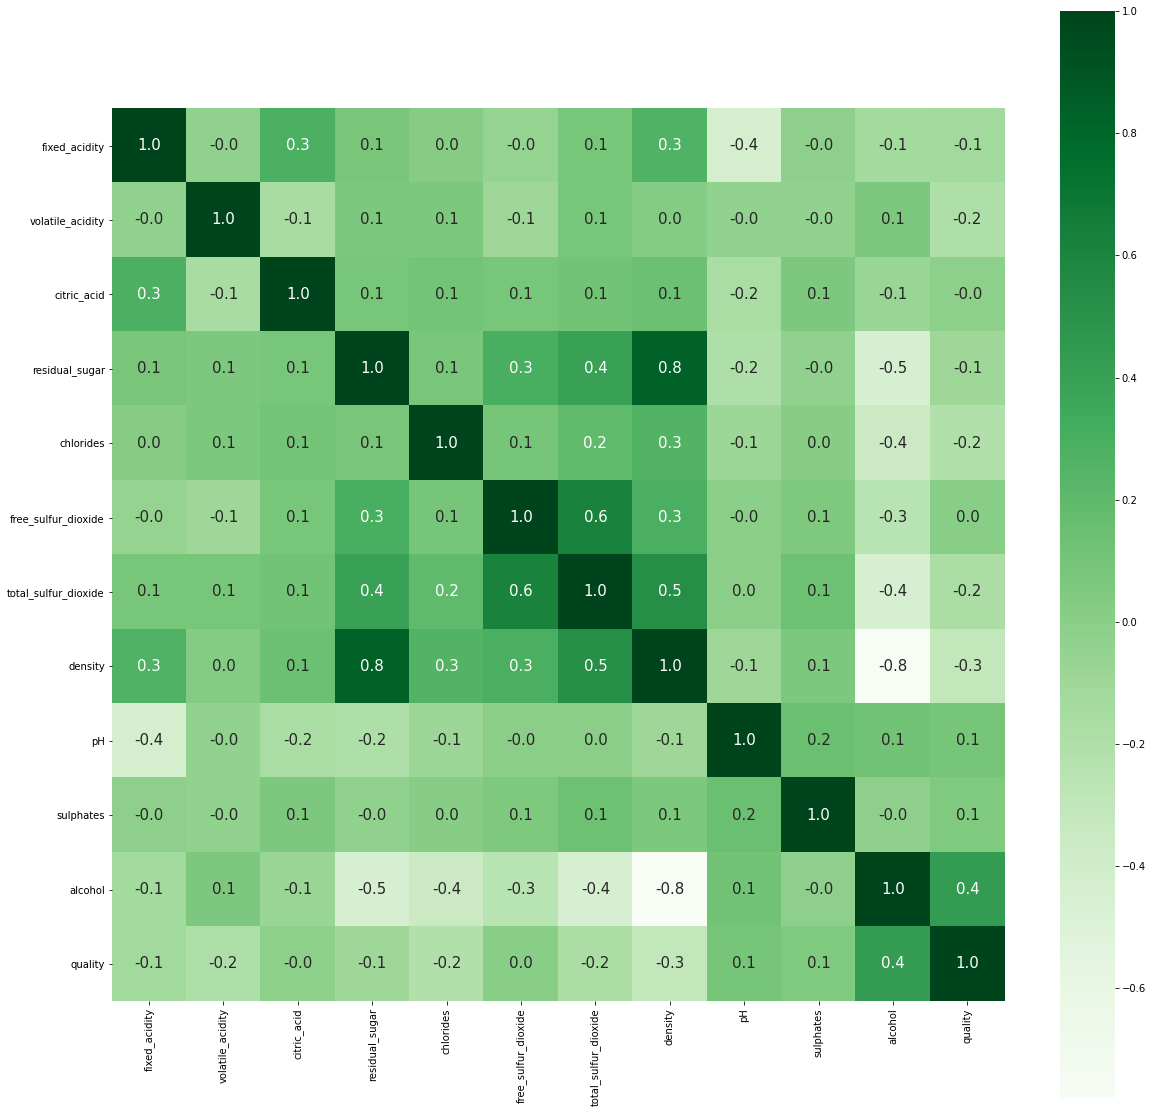

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
for index in range(len(dataset)):
  if dataset.loc[index,'citric_acid'] <= 0:
    dataset.loc[index,'citric_acid'] = 0.33
    # print('ada')


## **No.1**

In [ ]:
scale=[StandardScaler(),PowerTransformer(method='yeo-johnson'),PowerTransformer(method='box-cox'),
       QuantileTransformer(n_quantiles=100, random_state=10),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]

for index,value in enumerate(scale):
  scaler = value
  feature_used= dataset.drop(['quality'],axis=1)
  label = dataset['quality']
  feature_scaled =scaler.fit_transform(feature_used.values)
  feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

  Linear_reg = LinearRegression()
  Linear_reg.fit(feature_train, label_train)
  predictions = Linear_reg.predict(feature_test)

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("\n{}".format(value))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))


StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.5548082996403448
MAE (Mean Absolute Error) 0.5804277307089775
r^2 score 0.28955008495114465
RMSE (Root Mean Squared Error 0.7448545493184189

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 0.553078299702105
MAE (Mean Absolute Error) 0.5801977819625543
r^2 score 0.29176540564831843
RMSE (Root Mean Squared Error 0.7436923421026366

PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 0.5495736675844238
MAE (Mean Absolute Error) 0.5799931896296917
r^2 score 0.29625320006649514
RMSE (Root Mean Squared Error 0.7413323597310614

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='uniform', random_state=10,
                    subsample=100000)
MSE (Mean Squared Error) 0.549487944578978
MAE (Mean Absolute Error) 0.5854684653018515
r^2 score 0.2963629711387308
RMSE

berdasarkan hasil di atas yang menunjukan kinerja terbaik dalam dataset ini adalah quantile transformer

## **No.2**

In [ ]:
scaler = preprocessing.QuantileTransformer(n_quantiles=100, random_state=10)
feature_used= dataset.drop(['quality'],axis=1)
label = dataset['quality']
feature_scaled =scaler.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)


 <class 'sklearn.ensemble._forest.RandomForestRegressor'>

MSE (Mean Squared Error) 0.34928089795918366
MAE (Mean Absolute Error) 0.4317306122448979
r^2 score 0.5527345491331848
RMSE (Root Mean Squared Error 0.5909999136710459

 <class 'xgboost.sklearn.XGBRegressor'>

MSE (Mean Squared Error) 0.44778562744355904
MAE (Mean Absolute Error) 0.5183854050538977
r^2 score 0.4265960671756306
RMSE (Root Mean Squared Error 0.6691678619326835

<class 'sklearn.svm._classes.SVR'> kernel=linear
MSE (Mean Squared Error) = 0.5552507394870209 
MAE (Mean Absolute Error) = 0.5807488748463339 
r^2 score  = 0.28898352646294434 
RMSE (Root Mean Squared Error = 0.7451514876097483  


<class 'sklearn.svm._classes.SVR'> kernel=poly
MSE (Mean Squared Error) = 0.5215825947013364 
MAE (Mean Absolute Error) = 0.5553819953185789 
r^2 score  = 0.33209667134262255 
RMSE (Root Mean Squared Error = 0.7222067534309938  


<class 'sklearn.svm._classes.SVR'> kernel=rbf
MSE (Mean Squared Error) = 0.4825505392278933 
MAE 

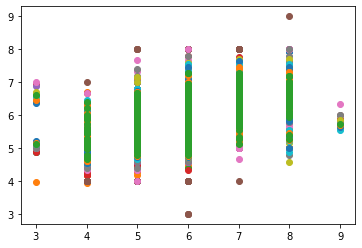

In [ ]:
algorithm =[RandomForestRegressor,xgb.XGBRegressor,SVR,KNeighborsRegressor]
n=[1,3,5,7,9,11,13,15]
kernel=['linear', 'poly', 'rbf']
for index, value in enumerate(algorithm):
  if value == RandomForestRegressor:
    reg = RandomForestRegressor(max_depth=100, random_state=10)
    reg.fit(feature_train, label_train)
    predictions = reg.predict(feature_test)
  if value == xgb.XGBRegressor:
    xgb_reg = xgb.XGBRegressor(max_depth=3,n_estimators=125,colsample_bytree=1,learning_rate=0.27,objective='reg:squarederror')
    xgb_reg.fit(feature_train, label_train)
    predictions = xgb_reg.predict(feature_test)
  if value == SVR:
    for i,v in enumerate(kernel):
      reggression = SVR(kernel=v)
      reggression.fit(feature_train, label_train)
      predictions = reggression.predict(feature_test)

      mse = mean_squared_error(label_test, predictions)
      mae = mean_absolute_error(label_test, predictions)
      r2 = r2_score(label_test, predictions)
      print('\n{} kernel={}'.format(value,v))
      print("MSE (Mean Squared Error) = {} ".format(mse))
      print("MAE (Mean Absolute Error) = {} ".format(mae))
      print("r^2 score  = {} ".format(r2))
      print('RMSE (Root Mean Squared Error = {}  \n'.format(np.sqrt(mean_squared_error(label_test, predictions))))
      plt.scatter(label_test, predictions)
    continue
  if value == KNeighborsRegressor:
    for i,v in enumerate(n):
      reggression = KNeighborsRegressor(n_neighbors=v)
      reggression.fit(feature_train, label_train)
      predictions = reggression.predict(feature_test)

      mse = mean_squared_error(label_test, predictions)
      mae = mean_absolute_error(label_test, predictions)
      r2 = r2_score(label_test, predictions)
      print('\n{} n_neighbors={}'.format(value,v))
      print("MSE (Mean Squared Error) = {} ".format(mse))
      print("MAE (Mean Absolute Error) = {} ".format(mae))
      print("r^2 score  = {}".format(r2))
      print('RMSE (Root Mean Squared Error = {}\n'.format(np.sqrt(mean_squared_error(label_test, predictions))))
      plt.scatter(label_test, predictions)
    continue

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print('\n',value)
  print("\nMSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  plt.scatter(label_test, predictions)

menurut hasil di atas yang terbaik adalah random forest. jika di lihat mengapa bisa jelek semua ? ini di karenakan data yang kita olah merupakan data yang target nya itu bisa merupakan klasifikasi. maka dari itu jika di lihat pada gambar sebaran datanya tidak menunjukan diagonal. maka dari itu akurasi yang di dapat kan sangat kurang.

## **Test Klasifikasi**

Accuracy of Logistik Regression on test set: 0.53
0.2072257182863228
0.22586632679446134
0.21242179243137474 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


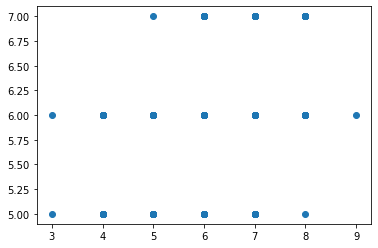

In [ ]:
classifier = LogisticRegression(max_iter=500)
classifier.fit(feature_train, label_train)
predictions = classifier.predict(feature_test)

print('Accuracy of {} on test set: {:.2f}'.format('Logistik Regression',classifier.score(feature_test, label_test))) # .score() -> Accuracy
print(f1_score(label_test, predictions, average='macro'))
print(precision_score(label_test, predictions, average='macro'))
print(recall_score(label_test, predictions, average='macro'),'\n')
plt.scatter(label_test, predictions)

Accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> on test set: 0.64
0.3862170497379208
0.4413724405862771
0.3599773589208825 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of <class 'sklearn.neighbors._classification.KNeighborsClassifier'> on test set: 0.53
0.2263268619088706
0.2230001613629222
0.2316116476291757 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of SVC with Kernel linear on test set: 0.52
0.167099173911163
0.15219974309569687
0.19200667279898972 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of SVC with Kernel poly on test set: 0.56
0.2658887409869393
0.37897982229578886
0.25141838496238555 

Accuracy of SVC with Kernel rbf on test set: 0.56
0.2265208740276688
0.23927703085244983
0.22974339115414383 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of <class 'sklearn.svm._classes.LinearSVC'> on test set: 0.53
0.19930199123583617
0.23908720616381215
0.2081367751806331 

Accuracy of <class 'sklearn.naive_bayes.GaussianNB'> on test set: 0.48
0.221219739286561
0.23309386211766073
0.23401557932590075 

Accuracy of <class 'sklearn.naive_bayes.BernoulliNB'> on test set: 0.44
0.08892043788317365
0.2058170774442238
0.1436210847975554 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs fa

Accuracy of <class 'sklearn.linear_model._logistic.LogisticRegression'> on test set: 0.53
0.20861805969292355
0.2280282190202049
0.21332744850313312 

Accuracy of <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'> on test set: 0.53
0.24977557013566234
0.2754936930457542
0.24318872036613842 

Accuracy of <class 'sklearn.tree._classes.DecisionTreeClassifier'> on test set: 0.61
0.3918436717911759
0.3919594937204752
0.39225949627329904 

Accuracy of <class 'xgboost.sklearn.XGBClassifier'> on test set: 0.53
0.1768661440258576
0.24788210290459167
0.1951203986340911 



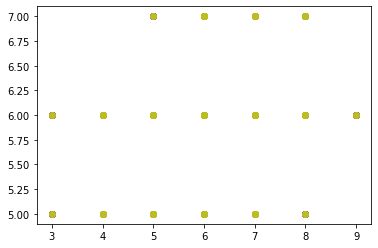

In [ ]:
algoritma=[RandomForestClassifier,KNeighborsClassifier,SVC,LinearSVC,GaussianNB,BernoulliNB,LogisticRegression,LinearDiscriminantAnalysis,DecisionTreeClassifier,xgb.XGBClassifier]

for index,value in enumerate(algoritma):
  if value == RandomForestClassifier:
    classifier = value(n_estimators=5, bootstrap=True, max_features = "sqrt")
    classifier.fit(feature_train, label_train)
  elif value == KNeighborsClassifier:
    classifier = value(13)
    classifier.fit(feature_train, label_train)
  elif value == SVC:
    kernels=["linear","poly","rbf"]
    for index,value_ker in enumerate(kernels):
      svc_classifier = SVC(kernel = value_ker)
      svc_classifier.fit(feature_train, label_train)
      # prediction
      prediction = svc_classifier.predict(feature_test)
      #hasil
      print('Accuracy of SVC with Kernel {} on test set: {:.2f}'.format(value_ker,svc_classifier.score(feature_test, label_test))) # .score() -> Accuracy
      print(f1_score(label_test, prediction, average='macro'))
      print(precision_score(label_test, prediction, average='macro'))
      print(recall_score(label_test, prediction, average='macro'),'\n')
    continue
  elif value == xgb.XGBClassifier:
    classifier = value(n_estimators=5,learning_rate=0.1,colsample_bytree=0.3,max_depth=5)
    classifier.fit(feature_train, label_train)
  else:
    classifier = value()
    classifier.fit(feature_train, label_train)
  
  # prediction
  prediction = classifier.predict(feature_test)
  #hasil
  print('Accuracy of {} on test set: {:.2f}'.format(value,classifier.score(feature_test, label_test))) # .score() -> Accuracy
  print(f1_score(label_test, prediction, average='macro'))
  print(precision_score(label_test, prediction, average='macro'))
  print(recall_score(label_test, prediction, average='macro'),'\n')
  plt.scatter(label_test, predictions)